In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('minipro.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [7]:
print(data.price.skew())

24.790932561757053


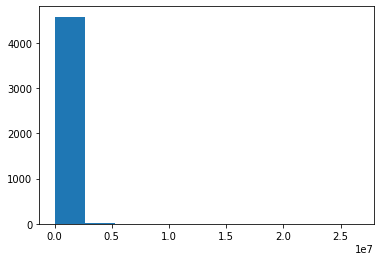

In [8]:
plt.hist(data.price)
plt.show()

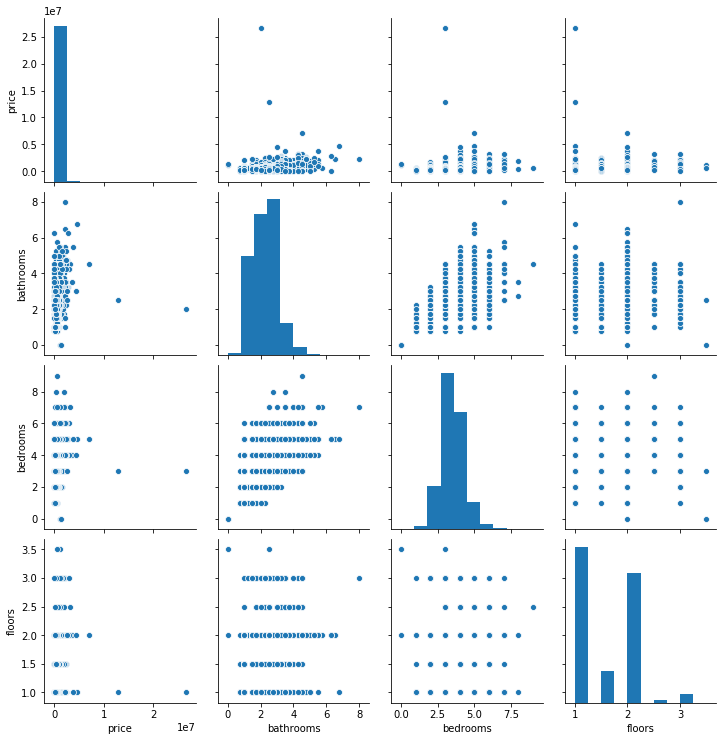

In [10]:
sns.pairplot(data[['price','bathrooms','bedrooms','floors']])

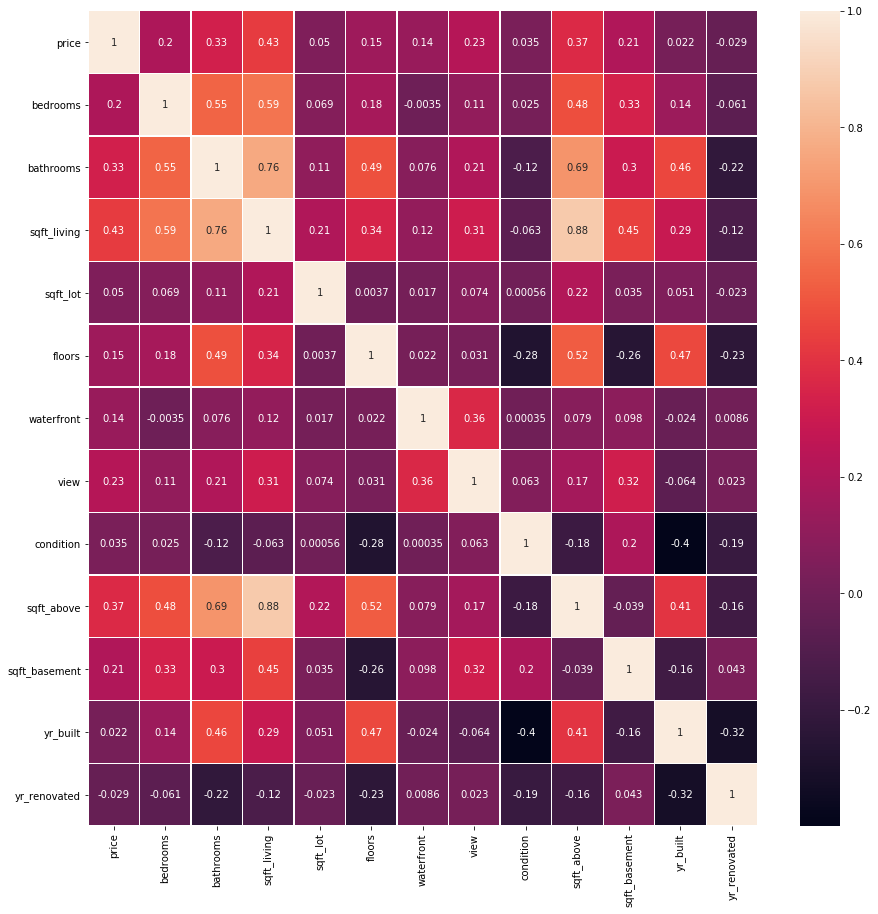

In [11]:
plt.subplots(figsize = (15,15))
sns.heatmap(data.drop(['date'],axis=1).corr(), linewidth = 0.3 ,annot =True )

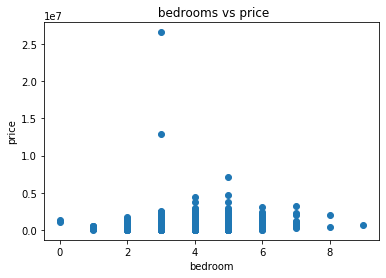

In [13]:
plt.scatter(data.bedrooms,data.price)
plt.title(' bedrooms vs price')
plt.xlabel("bedroom")
plt.ylabel("price")
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

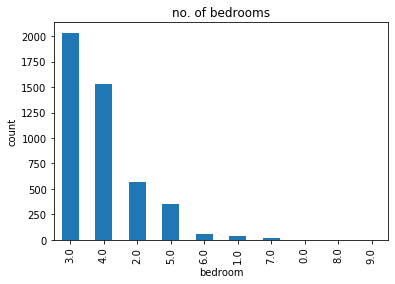

In [14]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('no. of bedrooms')
plt.xlabel("bedroom")
plt.ylabel("count")
sns.despine


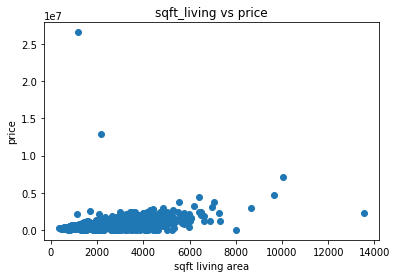

In [15]:
plt.scatter(data['sqft_living'],data['price'])
plt.title('sqft_living vs price')
plt.xlabel("sqft living area")
plt.ylabel("price")
plt.show()


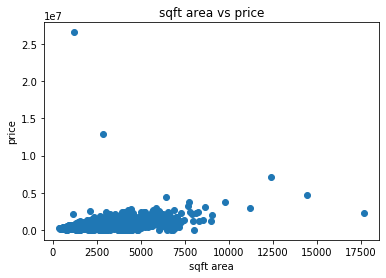

In [16]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])
plt.title("sqft area vs price")
plt.xlabel("sqft area")
plt.ylabel("price")
plt.show()


Text(0.5, 1.0, 'wavefront vs price')

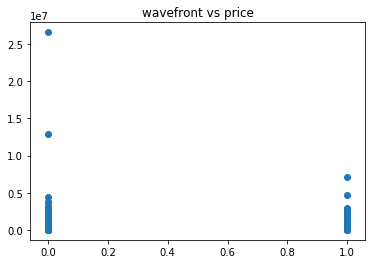

In [17]:
plt.scatter(data['waterfront'],data['price'])
plt.title("wavefront vs price")


In [46]:

x=data.drop(['view','country','yr_built','yr_renovated','price','street','city','statezip','date'],axis=1)
y=data['price']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [48]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
reg.score(x_test,y_test)

0.5091231367996032

In [71]:
y_pred=reg.predict(x_test)


In [55]:
from sklearn import metrics

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 173230.10625535224
Mean Squared Error: 72624457782.30241
Root Mean Squared Error: 269489.2535562456


In [57]:
#SVM linear

In [64]:
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [66]:
svclassifier = SVR(kernel='linear')
svclassifier.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred = svclassifier.predict(x_test)

In [68]:
print(svclassifier.score(x_train, y_train))
print(svclassifier.score(x_test, y_test))

0.15269129461054176
0.4594522842066746


In [69]:
metrics.r2_score(y_test,y_pred)

0.4594522842066746

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 169448.08552092462
Mean Squared Error: 73131670427.97922
Root Mean Squared Error: 270428.6790042417
